### Model evaluation

Generate QQ-plots and PP-plots to evaluate similiarity of observed data, forecast data before ML-correction and after ML-correction

In [13]:
# Import relevant libraries
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
from matplotlib import dates as mdates
from scipy import stats
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot_2samples
from statsmodels.distributions.empirical_distribution import ECDF

import statsmodels.formula.api as smf 

from ml_correction import add_cyclic_time

### Pre-Correction Evaluation

- QQ-Plots
- PP-Plots


In [14]:
# Load data - preprocessing
path_data = "../dataset/"
buoys_df = pd.read_csv(f"{path_data}prepared_buoy_data.csv", index_col=[0, 1])


In [45]:
# Clean and define arrays for buoy of interest
# Buoy 03
#kvs_03 = buoys_df.loc['KVS_SvalMIZ_03'].dropna()    # Drop NaN values from relevant buoy
#kvs_03_t1m, kvs_03_t2m= np.array(kvs_03['temp_air'].values), np.array(kvs_03['arome_t2m'].values) # Define variables
#kvs_03_t1m_sort, kvs_03_t2m_sort = np.sort(kvs_03_t1m), np.sort(kvs_03_t2m)
#Buoy 07
#kvs_07 = buoys_df.loc['KVS_SvalMIZ_07'].dropna()    # Drop NaN values from relevant buoy
#kvs_07_t1m, kvs_07_t2m = np.array(kvs_07['temp_air'].values), np.array(kvs_07['arome_t2m'].values) # Define variables
#kvs_07_t1m_sort, kvs_07_t2m_sort = np.sort(kvs_07_t1m), np.sort(kvs_07_t2m)
# Buoy 10
#kvs_10 = buoys_df.loc['KVS_SvalMIZ_10'].dropna()    # Drop NaN values from relevant buoy  
#kvs_10_t1m, kvs_10_t2m = np.array(kvs_10['temp_air'].values), np.array(kvs_10['arome_t2m'].values)# Define variables
#kvs_10_t1m_sort, kvs_10_t2m_sort = np.sort(kvs_10_t1m), np.sort(kvs_10_t2m)

train_names=['KVS_SvalMIZ_03', 'KVS_SvalMIZ_07']
train_df = buoys_df.loc[train_names].dropna()
train_df_t1m, train_df_t2m = np.array(train_df['temp_air'].values), np.array(train_df['arome_t2m'].values)
train_df_t1m, train_df_t2m = np.sort(train_df_t1m), np.sort(train_df_t2m)

test_names = ['KVS_SvalMIZ_10']
test_df = buoys_df.loc[test_names].dropna()
test_df_t1m, test_df_t2m = np.array(test_df['temp_air'].values), np.array(test_df['arome_t2m'].values)
test_df_t1m, test_df_t2m = np.sort(test_df_t1m), np.sort(test_df_t2m)


In [46]:
# In terms of training and test sets
#kvs_train_t1m, kvs_train_t2m = np.concatenate([kvs_03_t1m, kvs_07_t1m]), np.concatenate([kvs_03_t2m, kvs_07_t2m])
#kvs_test_t1m, kvs_test_t2m = kvs_10_t1m, kvs_10_t2m


#### QQ-Plot -> Better than normal Scatter Plot???
- Quantile vs quantile plot of observed data vs forecasted data
- Effective to detect model biases in specific ranges
- Highest resolution in tails of the distribution (lowest and highest values)

#### PP-plot
- Probability vs. probability plot of observed data and forecast data
- Effective to detect skewness in differences
- High resolution around modal value of distribution (central values)

#### Residual plots
- Residual in observed - forecasted
- Should be white noise
    - Can show biases

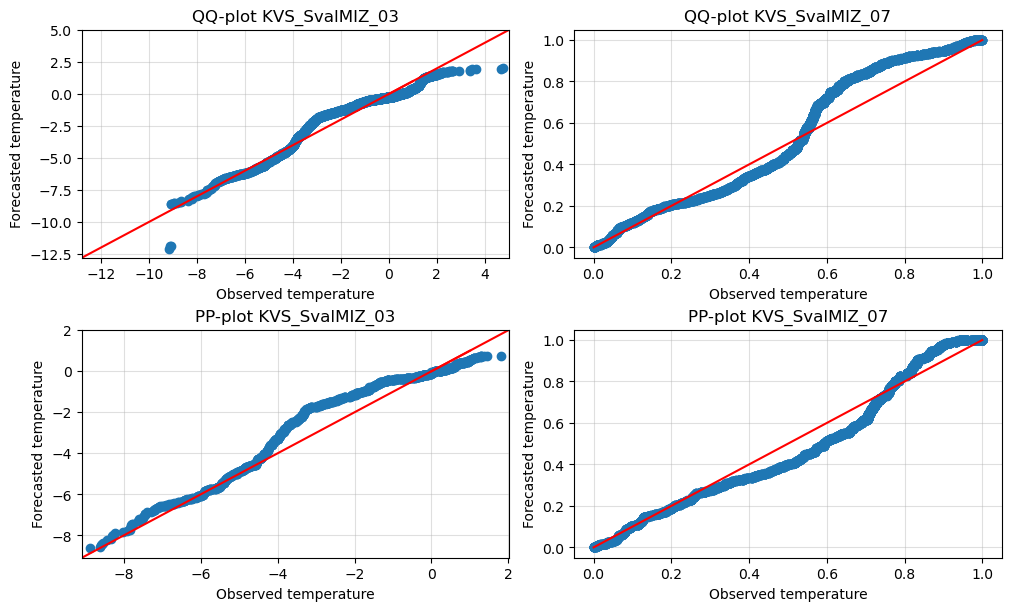

QQ-plot and PP-plot for all data combined??


In [ ]:
# QQ-plot & PP-plot
#buoys = ['KVS_SvalMIZ_03', 'KVS_SvalMIZ_07', 'KVS_SvalMIZ_10']
data_sets = ['train', 'test']
# Prep PP-plotsc
#F_kvs_03_t1m, F_kvs_03_t2m = ECDF(kvs_03_t1m_sort), ECDF(kvs_03_t2m_sort)   # Buoy 03
#F_kvs_07_t1m, F_kvs_07_t2m = ECDF(kvs_07_t1m_sort), ECDF(kvs_07_t2m_sort)   # Buoy 07
#F_kvs_10_t1m, F_kvs_10_t2m = ECDF(kvs_10_t1m_sort), ECDF(kvs_10_t2m_sort)   # Buoy 10
F_train_t1m, F_train_t2m = ECDF(train_df_t1m), ECDF(train_df_t2m)
F_test_t1m, F_test_t2m = ECDF(test_df_t1m), ECDF(test_df_t2m)

#x_kvs_03=np.sort(np.unique(np.concatenate([kvs_03_t1m_sort, kvs_03_t2m_sort])))
#x_kvs_07=np.sort(np.unique(np.concatenate([kvs_07_t1m_sort, kvs_07_t2m_sort])))
#x_kvs_10=np.sort(np.unique(np.concatenate([kvs_10_t1m_sort, kvs_10_t2m_sort])))
x_train = np.sort(np.unique(np.concatenate([train_df_t1m, train_df_t2m])))
x_test = np.sort(np.unique(np.concatenate([train_df_t1m, train_df_t2m])))


#p_kvs_03_t1m, p_kvs_03_t2m = F_kvs_03_t1m(x_kvs_03), F_kvs_03_t2m(x_kvs_03)
#p_kvs_07_t1m, p_kvs_07_t2m = F_kvs_07_t1m(x_kvs_07), F_kvs_07_t2m(x_kvs_07)
#p_kvs_10_t1m, p_kvs_10_t2m = F_kvs_10_t1m(x_kvs_10), F_kvs_10_t2m(x_kvs_10)
p_train_df_t1m, p_train_df_t2m = F_train_t1m(x_train), F_train_t2m(x_train)
p_test_df_t1m, p_test_df_t2m = F_test_t1m(x_test), F_test_t2m(x_test)


fig, ax = plt.subplots(nrows= len(data_sets), ncols=2, figsize=(10, 6), layout='constrained')
#qqplot_2samples(kvs_03_t1m_sort, kvs_03_t2m_sort, line='45', ax=ax[0,0])  # '45' draws y=x reference
#qqplot_2samples(kvs_07_t1m_sort, kvs_07_t2m_sort, line='45', ax=ax[0,1])  # '45' draws y=x reference   
#qqplot_2samples(kvs_10_t1m_sort, kvs_10_t2m_sort, line='45', ax=ax[0,2])  # '45' draws y=x reference
qqplot_2samples(train_df_t1m, train_df_t2m, line='45', ax=ax[0,0])
qqplot_2samples(test_df_t1m, test_df_t2m, line='45', ax=ax[1,0])

#ax[1,0].plot(p_kvs_03_t1m, p_kvs_03_t2m, 'o', label='PP-plot', )
#ax[1,1].plot(p_kvs_07_t1m, p_kvs_07_t2m, 'o', label='PP-plot')
#ax[1,2].plot(p_kvs_10_t1m, p_kvs_10_t2m, 'o', label='PP-plot')
ax[0,1].plot(p_train_df_t1m, p_train_df_t2m, 'o', label='PP train')
ax[1,1].plot(p_test_df_t1m, p_test_df_t2m, 'o', label='PP test')

titles=['QQ-plot', 'PP-plot']
for a in range(len(data_sets)):
    title=titles[a]
    for b in range(2):
        ax[b,a].grid(True, alpha=0.4)
        ax[b,a].plot([0,1], [0,1], c='red')
        ax[b,a].set_title(f'{title} {buoys[b]}')
        ax[b,a].set_xlabel('Observed temperature')    #The other way around??
        ax[b,a].set_ylabel('Forecasted temperature')
    #ax[a].hlines(0, t_min, t_max, color='black', alpha=0.5, ls='--')
    

#ax.set_title('QQ plot:\n Buoy observation vs AROME forecast')
#ax.grid(True, alpha=0.3)
plt.show()

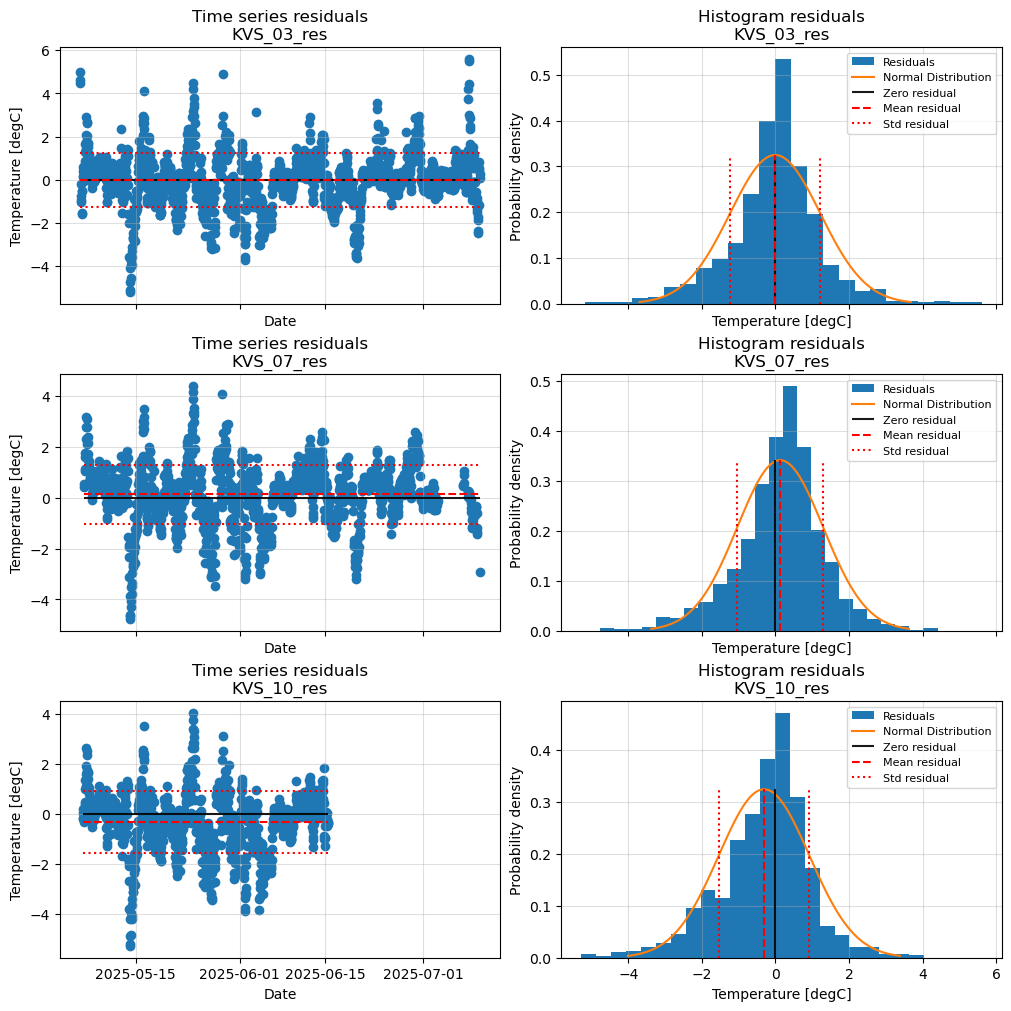

In [18]:
# Residuals Obs-Forecasted
kvs_03_res = kvs_03_t1m - kvs_03_t2m
kvs_07_res = kvs_07_t1m - kvs_07_t2m
kvs_10_res = kvs_10_t1m - kvs_10_t2m


res_list = [kvs_03_res, kvs_07_res, kvs_10_res]
res_list_names = ['KVS_03_res', 'KVS_07_res', 'KVS_10_res']
buoy_list = [kvs_03, kvs_07, kvs_10]

fig, ax = plt.subplots(nrows=len(res_list), ncols=2, sharex='col',figsize=(10, 10), layout='constrained')
for res in range(len(res_list)):
    ax[res,0].scatter(pd.to_datetime(buoy_list[res].index.values), res_list[res], label='Residual')

    ax[res,0].set_title(f'Time series residuals\n{res_list_names[res]}')
    ax[res,0].set_ylabel('Temperature [degC]')
    ax[res,0].set_xlabel('Date')
    ax[res,0].grid(True, alpha=0.4)
    ax[res,0].hlines(0, (pd.to_datetime(buoy_list[res].index.values)).min(), (pd.to_datetime(buoy_list[res].index.values)).max(), color='black', alpha=0.9)
    ax[res,0].hlines(res_list[res].mean(), (pd.to_datetime(buoy_list[res].index.values)).min(), 
                     (pd.to_datetime(buoy_list[res].index.values)).max(), color='red', ls='--')
    ax[res,0].hlines([res_list[res].mean()-res_list[res].std(),res_list[res].mean()+res_list[res].std()] , 
                     (pd.to_datetime(buoy_list[res].index.values)).min(), (pd.to_datetime(buoy_list[res].index.values)).max(), color='red', ls=':')

    mean, sd, n = res_list[res].mean(), res_list[res].std(), res_list[res].shape[0]
    k = int(1+3.3*np.log(n))
    x=np.linspace(mean-3*sd, mean+3*sd, 100)

    ax[res,1].hist(res_list[res], bins=k, density=True, label='Residuals')
    ax[res,1].plot(x, stats.norm.pdf(x, loc=mean, scale=sd), label='Normal Distribution')

    ax[res,1].grid(True, alpha=0.4)
    ax[res,1].set_title(f'Histogram residuals\n{res_list_names[res]}')
    ax[res,1].set_ylabel('Probability density')
    ax[res,1].set_xlabel('Temperature [degC]')
    ax[res,1].vlines(0,0,stats.norm.pdf(x, loc=mean, scale=sd).max(), color='black', alpha=0.9, label='Zero residual')
    ax[res,1].vlines(mean, 0, stats.norm.pdf(x, loc=mean, scale=sd).max(), ls='--', color='red', label='Mean residual')
    ax[res,1].vlines([mean-sd, mean+sd], 0, stats.norm.pdf(x, loc=mean, scale=sd).max(), ls=':', color='red', label='Std residual')

    ax[res,1].legend(loc='upper right', fontsize=8)

#### Evaluation Post-processing
- Develop OLS model on train set (buoy 03, 07)
    - OLS model incl. or excl. arome_t2m?
        - incl. arome_t2m makes more sense, since we want to improve the existing predicitions
        - excl. arome_t2m just as exercise for comparison, but doesn't make sense - right(?)

- QQ and PP plots
- Residual plots


In [19]:
# Prepare OLS model on trainig data (buoy 03, 07)
train_names= ['KVS_SvalMIZ_03','KVS_SvalMIZ_07']
test_names=['KVS_SvalMIZ_10']

ols_train_df=buoys_df.loc[train_names].dropna()
ols_test_df=buoys_df.loc[test_names].dropna()

dt=(ols_train_df.index.get_level_values(-1))
dt=pd.to_datetime(dt)
ols_train_df['hour']=dt.hour
ols_train_df['doy']=dt.dayofyear
ols_train_df = add_cyclic_time(ols_train_df.copy())

dt=(ols_test_df.index.get_level_values(-1))
dt=pd.to_datetime(dt)
ols_test_df['hour']=dt.hour
ols_test_df['doy']=dt.dayofyear
ols_test_df = add_cyclic_time(ols_test_df.copy())

print(ols_train_df.columns)

Index(['lat', 'lon', 'arome_t2m', 'temp_air', 'temp_surf', 'temp_snow_ice',
       'temp_ice', 'sic', 'hour', 'doy', 'hour_sin', 'hour_cos', 'day_sin',
       'day_cos'],
      dtype='object')


In [31]:
# OLS fit1 w/ arome_t2m: improve forecast based on other params
fit1=smf.ols(formula='temp_air ~  sic + hour_cos + hour_sin + day_sin + day_cos + arome_t2m', data=ols_train_df).fit() #lat + lon +
rmse_ols1_train=np.sqrt(fit1.mse_resid)
print(f'RMSE on training data (air temp at 1m of buoy 03, 07) is: {rmse_ols1_train:.5f}\n')
print('The list of parameters of the OLS model on the training set (buoy 03, 07)\n')
print(fit1.params)

#fit1.summary()

RMSE on training data (air temp at 1m of buoy 03, 07) is: 1.13014

The list of parameters of the OLS model on the training set (buoy 03, 07)

Intercept    4.962832
sic          1.045111
hour_cos    -0.378533
hour_sin    -0.060917
day_sin     -3.784758
day_cos      5.110939
arome_t2m    0.855184
dtype: float64


In [22]:
"""
# OLS fit2 withOUT arome_t2m: Predict air temp based on other params
fit2=smf.ols(formula='temp_air ~ lat + lon + sic + hour + doy', data=ols_train_df).fit()
rmse_ols2_train=np.sqrt(fit2.mse_resid)
print(f'RMSE on training data (air temp at 1m of buoy 03, 07) is: {rmse_ols2_train:.5f}\n')
print('The list of parameters of the OLS model on the training set (buoy 03, 07)\n')
print(fit2.params)

#fit2.summary()
"""

"\n# OLS fit2 withOUT arome_t2m: Predict air temp based on other params\nfit2=smf.ols(formula='temp_air ~ lat + lon + sic + hour + doy', data=ols_train_df).fit()\nrmse_ols2_train=np.sqrt(fit2.mse_resid)\nprint(f'RMSE on training data (air temp at 1m of buoy 03, 07) is: {rmse_ols2_train:.5f}\n')\nprint('The list of parameters of the OLS model on the training set (buoy 03, 07)\n')\nprint(fit2.params)\n\n#fit2.summary()\n"

In [33]:
ols_test_df['pred_ols1'] = fit1.params[0] +fit1.params[1] * ols_test_df['sic'] + fit1.params[2] * ols_test_df['hour_cos'] + \
                            fit1.params[3] * ols_test_df['hour_sin'] + fit1.params[4] * ols_test_df['day_sin'] + \
                                fit1.params[5] * ols_test_df['day_cos'] + fit1.params[6] * ols_test_df['arome_t2m'] # fit1.params[1] * ols_test_df['lat'] + fit1.params[2] * ols_test_df['lon'] + \
                            

rmse_arome = np.sqrt(((ols_test_df['temp_air'] - ols_test_df['arome_t2m'])**2).mean())
rmse_ols1_test = np.sqrt(((ols_test_df['temp_air'] - ols_test_df['pred_ols1'])**2).mean())
#rmse_ols2_test = np.sqrt(((ols_test_df['temp_air'] - ols_test_df['pred_ols2'])**2).mean())

print(f'RMSE of fit1 on TRAINING data (buoy 03, 07): {rmse_ols1_train:.5f}\n')
#print(f'RMSE of fit2 on TRAINING data (buoy 03, 07): {rmse_ols2_train:.5f}\n')
print(f'RMSE of fit1 on TEST data (buoy 10): {rmse_ols1_test:.5f}\n')
#print(f'RMSE of fit2 on TEST data (buoy 10): {rmse_ols2_test:.5f}\n')
print(f'RMSE AROME and Observations (buoy 10): {rmse_arome:.5f}')
#ols_test_df.head()

RMSE of fit1 on TRAINING data (buoy 03, 07): 1.13014

RMSE of fit1 on TEST data (buoy 10): 1.19389

RMSE AROME and Observations (buoy 10): 1.27077


#### Evaluation post-processing
- QQ-plots and PP-plots

In [27]:
# Load data - postprocessing
path_data = "../dataset/"
buoy10_df_post = pd.read_csv(f"{path_data}buoy_10_w_models.csv", index_col=[0, 1])
ols_temp_df = ols_test_df.copy().reset_index(level=0, drop=True)
#ols_temp_df.head()

buoy10_df_post['ols_temp']=ols_temp_df['pred_ols1'].values
print(buoy10_df_post.columns)
#buoy10_df_post.head()

Index(['lon', 'arome_t2m', 'temp_air', 'temp_surf', 'temp_snow_ice',
       'temp_ice', 'sic', 'residuals', 'hour', 'doy', 'NN_temp', 'FNN_temp',
       'xgb_temp', 'xgbdo_temp', 'xgbpo_temp', 'ols_temp'],
      dtype='object')


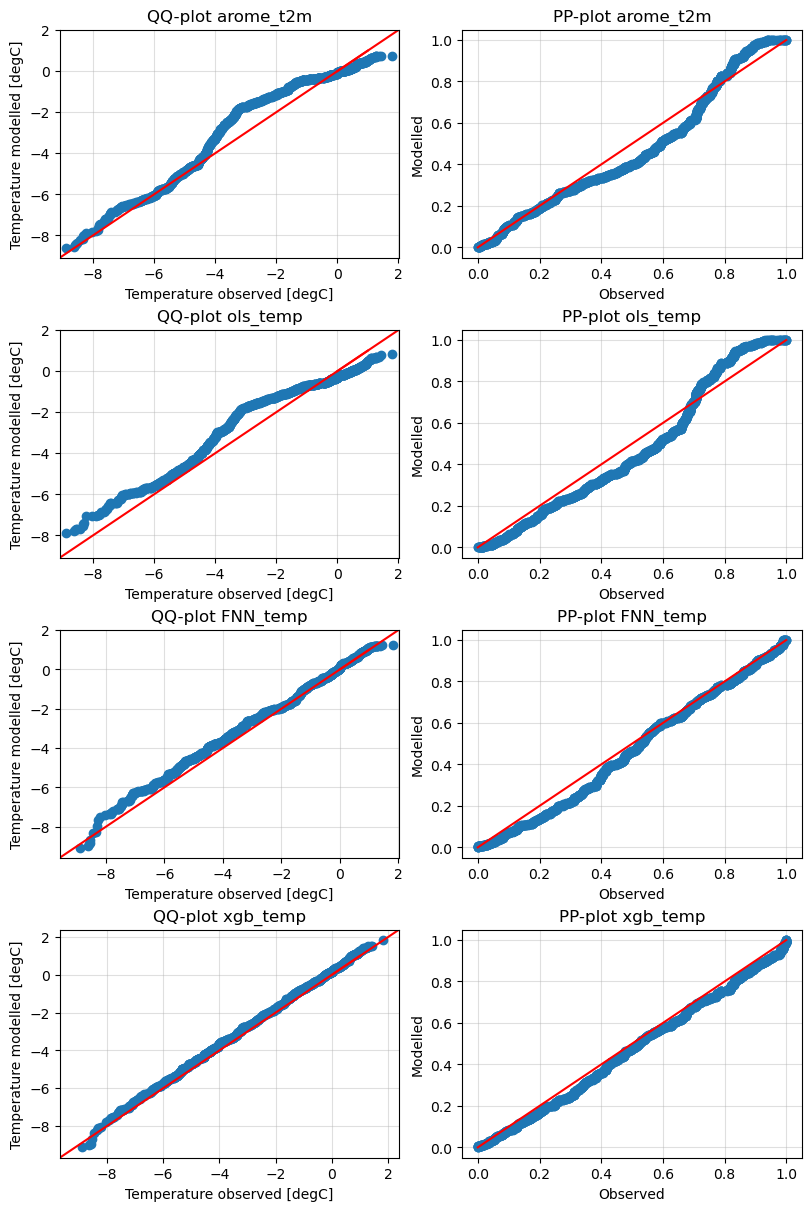

In [39]:
#temp_post_names=['temp_air', 'arome_t2m', 'NN_temp', 'FNN_temp', 'xgb_temp', 'xgbdo_temp', 'xgbpo_temp', 'ols_temp']
temp_post_names=['temp_air', 'arome_t2m', 'ols_temp', 'FNN_temp', 'xgb_temp']
#temp_air, arome_t2m, NN_temp, FNN_temp, xgb_temp, xgbdo_temp, xgbpo_temp, ols_temp = [buoy10_df_post[t].to_numpy() for t in temp_post_names]
temp_air, arome_t2m, ols_temp, FNN_temp, xgb_temp = [buoy10_df_post[t].to_numpy() for t in temp_post_names]
#temp_post_list = [temp_air, arome_t2m, NN_temp, FNN_temp, xgb_temp, xgbdo_temp, xgbpo_temp, ols_temp]
temp_post_list = [temp_air, arome_t2m, ols_temp, FNN_temp, xgb_temp]
temp_post_list = [np.sort(a) for a in temp_post_list]

fig, ax = plt.subplots(nrows=len(temp_post_names)-1, ncols=2, figsize=(8,12), layout='constrained')

for a in range(1, len(temp_post_names)):
    # QQ-plot
    qqplot_2samples(temp_post_list[0], temp_post_list[a], line='45', ax=ax[a-1,0])

    # PP-plot
    F_ = ECDF(temp_post_list[a])
    F_0 = ECDF(temp_post_list[0])
    x_=np.sort(np.unique(np.concatenate([temp_post_list[0], temp_post_list[a]])))

    p_=F_(x_)
    p_0=F_0(x_)
    ax[a-1,1].plot(p_0, p_,'o')
    for b in range(2):
        ax[a-1,b].grid(True, alpha=0.4)
        ax[a-1,b].plot([0,1], [0,1],c='red')
        
    ax[a-1,0].set_title(f'QQ-plot {temp_post_names[a]}')
    ax[a-1,0].set_xlabel('Temperature observed [degC]')
    ax[a-1,0].set_ylabel('Temperature modelled [degC]')

    ax[a-1,1].set_title(f'PP-plot {temp_post_names[a]}')
    ax[a-1,1].set_xlabel('Observed')
    ax[a-1,1].set_ylabel('Modelled')

plt.show()

#### Evaluation post-processing
- Residual distribution

In [ ]:
res_list_names = ['arome_res', 'NN_res', 'FNN_res', 'xgb_res', 'xgbdo_res', 'xgbpo_res', 'ols_res']
mod_temp_names = ['arome_t2m', 'NN_temp', 'FNN_temp', 'xgb_temp', 'xgbdo_temp', 'xgbpo_temp', 'ols_temp']
arome_res, NN_res, FNN_res, xgb_res, xgbdo_res, xgbpo_res, ols_res = [buoy10_df_post[t] - buoy10_df_post['temp_air'] for t in mod_temp_names]
